# Неделя 1. Четверг
## Проверка статистических гипотез

In [26]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns



### Задание № 1. Гипотеза о доле

Реализовать функцию, позволяющую проверять гипотезу о доле. На вход функция принимает два значения для долей, объем выборки и уровень значимости. 

In [27]:
def proportion_test(p_hat, p_0, n, alpha):
    z_stat = (p_hat - p_0)/np.sqrt(p_0*(1-p_0)/n)
    p_value = 2 * (1 - st.norm(0, 1).cdf(abs(z_stat)))
    return z_stat, p_value

In [28]:
p_hat = 0.57
p_0 = 0.5
alpha = .05
n = 100

proportion_test(p_hat, p_0, n, alpha)

(np.float64(1.399999999999999), np.float64(0.16151331846754235))

- Проверьте:  
    - можно ли считать монетку честной, если после 100 подбрасываний, выпало 57 орлов  
    - Стала ли статистически значимо эффективнее реклама, если ранее конверсия была 0.2, а сейчас на выборке из 200 элементов конверсия вышла 0.3

### Задание № 2. Гипотеза о среднем
Реализовать функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы. 
* `alpha` - уровень значимости
* `independent` - `True` или `False`

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [29]:
def ttest(sample_1, sample_2, alternative='twosided', alpha=.05, independent=True):
    mu1 = sample_1.mean()
    mu2 = sample_2.mean()
    s1 = sample_1.var()
    s2 = sample_2.var()
    n1 = len(sample_1)
    n2 = len(sample_2)
    t_stat = (mu1 - mu2)/ np.sqrt(s1/n1+s2/n2)
    p_value = 2 * (1 - st.t.cdf(abs(t_stat),df= n-1))
    
    return t_stat, p_value

☑️ Проверьте свой результат с помощью scipy-функций `ttest_ind` (для случай независимых выборок) и `ttest_rel`(для случая зависимых выборок).

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 01-05-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`

### Задание № 3. Доверительный интервал

Реализовать функцию, позволяющую строить доверительный интервал для среднего. На вход функции поступает выборка (n > 20), уровень значимости. 

In [30]:
def conf_ints(sample: list, alpha: float):
    n = len(sample)
    var = np.var(sample, ddof = 1) # дисперсия 
    s = np.sqrt(var) # стандартное октлонение
    se = s / np.sqrt(n) # стандартная ошибка отклонения
    mu = sample.mean() # соеднее значенние
    t_crit = st.t.ppf(1 - alpha/2, df = n -1)
    lower_bound = mu - t_crit*se
    upper_bound = mu + t_crit*se

    return lower_bound, upper_bound

In [31]:
sample = np.random.normal(100, 20, size=10)
print('наше решение:')
print(conf_ints(sample, alpha=0.60))
print('Из коробки:')
print(st.t.interval(loc = sample.mean(), scale=st.sem(sample), confidence=0.6, df=len(sample)-1))


наше решение:
(np.float64(100.40257401969404), np.float64(108.69524150559252))
Из коробки:
(np.float64(97.80921981692481), np.float64(111.28859570836177))


* Постройте 95%-доверительный интервал для среднего кубика, у которого вот такой результат

    - [6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6]
    - честный ли он?

### Задание № 4 Bootstrap

* Есть сервис по доставке еды, который заявляет, что среднее время их доставки составляет 20 минут

* Мы подняли все наши заказы у данного сервиса

In [32]:
sample = np.array(
    [10, 13, 18, 8, 14, 15, 14, 15, 10, 14, 21, 20, 18, 13, 10, 13, 11, 10, 21, 16, 18, 21, 22, 20, 25, 14, 12, 14, 11, 16, 30, \
     29, 30, 31, 28, 28, 24, 48, 35, 50, 33, 18, 31, 22, 33, 27, 28, 44, 22, 23, 28, 23, 22, 30,27, 30, 30, 41, 26, 29, 35, 28, 27,\
     22, 25, 33, 28, 7, 19, 15, 20, 36, 22, 17, 17, 29, 14, 31, 11, 16, 24, 13, 15 ,21, 30, 26, 19, 21, 13, 16, 29, 37, 26, 15, 21,\
     24, 12, 27, 18, 32, 33, 47, 23, 33, 17, 19, 25, 15, 14, 20, 23, 13, 44, 33, 48, 34, 34, 28, 27, 21, 26, 44, 41
     ]
)

* Постройте 95% - доверительный интервал для среднего с помощью метода Bootstrap и проверьте, действительно ли заявленная цифра соответствует действительности

In [33]:
def bootstrap_conf_ints(sample: list, alpha: float):
    n = 200
    array = []
    sample = np.array(sample)
    for i in range(n):
        arr = np.random.choice(sample, size = len(sample), replace=True)
        array.append(np.mean(arr))
    lower_value = np.percentile(array, 2.5)
    upper_value = np.percentile(array, 97.5)
    return lower_value, upper_value, array

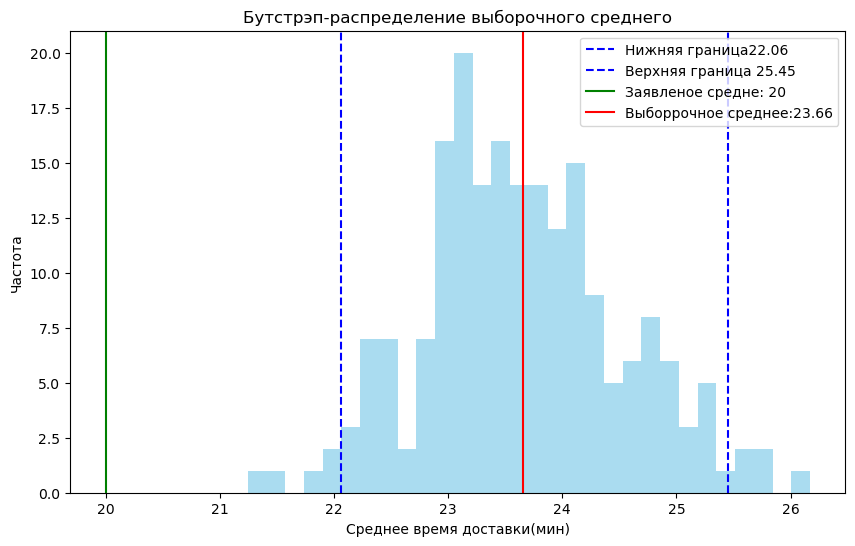

In [34]:
lower, upper, bootstrap_means = bootstrap_conf_ints(sample, alpha= 0.05)
plt.figure(figsize=(10,6))
#sns.histplot(bootstrap_means, kde=True)
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='skyblue')
plt.axvline(lower, color='b', linestyle='--', label=f'Нижняя граница{lower:.2f}')
plt.axvline(upper, color='b',linestyle='--',label=f'Верхняя граница {upper:.2f}')
plt.axvline(20, color='g', linestyle='-', label='Заявленое средне: 20')
plt.axvline(np.mean(sample), color='r', linestyle='-', label=f'Выборрочное среднее:{np.mean(sample):.2f}')
plt.title('Бутстрэп-распределение выборочного среднего')
plt.xlabel('Среднее время доставки(мин)')
plt.ylabel('Частота')
plt.legend()

### Задание № 5 

Допустим, вы думаете, что $25\%$ студентов вашего университета ни разу не пропустили ни одной лекции. В выборочном опросе из $75$ случайных студентов таких оказалось $15$ человек. Проверьте свою гипотезу на уровне значимости $\alpha = 0.02$ против двусторонних альтернатив. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

❓Каким критерием можно проверить эту гипотезу и почему?
гипотеза о доле,

> ответ тут

In [35]:
n = 75 # размер выборки
alpha = 0.02 # уровень значимости мы готовы ошибиться на 2 %
p0= 0.25 # гопотетическая доля
x = 15 # количесвтво студентов без пропусков
p1 = x/n #выборочная доля
se =np.sqrt(p0*(1 -p0)/n) # стандартная ошибка доли
z = (p1 - p0)/ se # z статистика
p_value =  2*(1-st.norm(0,1).cdf(abs(z)))

print(p_value)

0.31731050786291415


p_value> alpha, не отвергаем нулевую гипотезу так как нет статистически значимых доказательств что доля студентов будет отличаться от 25%

### Задание № 6

Допустим мы предполагаем, что стандартное отклонение в стобалльном рейтинге студентов равно $15$. И решаем проверить это, оценив рейтинг знакомых. Получилась выборка объема $n = 20$, у
которой выборочное стандартное отклонение равно $14$.  
Уровень значимости возьмём $\alpha = 0.1$, а альтернативы рассмотрим двусторонние. Используй для этого соответствующий критерий из `scipy`. 

проверка гипотезы о дисперсии
H0: s0 == s1
x**2 = (n -1)* s0**2/s1**2

In [43]:
s0 = 14 #выборочное стандарное отклонение
n = 20 #размер выборки
alpha1 = 0.1 #уровень значимости
s1 = 15 # предполагаемое стандартное отклонение
chi2 = (n -1)* (s0**2/s1**2) #Вычисляем статистику Хи квадрат
print(f'Статистика хи-квадрат: {chi2:.4f}')

#Критические значения для двустороннего теста
chi2_crit_left =  st.chi2.ppf(alpha1/2, df= n-1)
chi2_crit_right = st.chi2.ppf(1 - alpha1/2, df = (n-1))
print(f'Критическая левая сторона:{chi2_crit_left:.4f}')
print(f'Критическая правая сторона:{chi2_crit_right:.4f}')

p_left = st.chi2.cdf(chi2,df= n-1)
p_right = st.chi2.cdf(chi2,df=n-1)
p_value = 2 * min(p_left,p_right)
print(f'P_value:{p_value:.4f}')

Статистика хи-квадрат: 16.5511
Критическая левая сторона:10.1170
Критическая правая сторона:30.1435
P_value:0.7595


p_value > alpha1  H0 не отвергаем

### Задание № 7

Пусть для выборки объема $n = 25$ вычислено среднее  $\bar{x} = 130$. Из предыдущих исследований известно стандартное отклонение $\sigma = 12$. Постройте $98\%$ доверительный интервал для среднего значения.

In [37]:
# code

### Задание № 8

Реализуй класс, позволяющий проводить проверку гипотезу о средних для двух выборок. 
1. В конструктор класса передаются две выборки
2. В методе `compute_stat` вычисляется `t` или `z` статистика (соответственно, дисперсия либо вычисляется, либо передается как параметр)
3. В методе `test` проводится тестирование, метод возвращает значение статистики, p_value и результат проверки
4. Выбирается альтернатива: двухсторонняя, правая или левая
5. Уровень значимости по умолчанию равен $0.05$ (может быть переназначен пользователем)
6. Добавь метод, позволяющий вычислять доверительные интервалы для средних для обеих выборок

In [38]:
class StatTester():
    def __init__(self, sample1, sample2):
        self.sample1 = sample1
        self.sample2 = sample2
        # код
        
    def compute_stat(self, ...):
        # код
        
    def test(self, ...):
        # код
        return
    
    def compute_conf_ints(self, ...):
        # код
        
        

SyntaxError: invalid syntax (714016353.py, line 7)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "hypothesis tasks completed"`
4. Выполни команду `git push`